<a href="https://colab.research.google.com/github/AsmaShaikhTMU/Projects/blob/main/Initial_Results_and_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset Review and ML Model Building

---



## 1. Introduction

**This notebook performs data preprocessing, model building, and analysis on Dataset #1 (Diabetes Dataset)**

## 2. Importing libraries and loading the Dataset:

In [10]:
# Install necessary libraries (Run only once)
!pip install pandas matplotlib seaborn markdown2 weasyprint

# Import libraries
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.9/297.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 38.1 MB/s eta 0:00:00


In [11]:
# dataset 1

import pandas as pd

# Use the RAW URL, not the repository URL
url = "https://raw.githubusercontent.com/AsmaShaikhTMU/Projects/main/diabetes_prediction_dataset.csv"

# Read the CSV file directly from GitHub
df = pd.read_csv(url)

# Display the first few rows
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [12]:
# dataset 2

import pandas as pd  # Use pd instead of pd2

# Correct RAW URL
url = "https://raw.githubusercontent.com/AsmaShaikhTMU/Projects/main/diabetes_012_health_indicators_BRFSS2015.csv"

# Read CSV file
df2 = pd.read_csv(url)

# Display first few rows
df2.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# 3. Cleaning and Preprocessing the Dataset:

In [ ]:
# Display dataset shape (Rows, Columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (100000, 9)


In [ ]:
# Display dataset info (column types, null values, memory usage)
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Note that Categorical Columns (gender, and smoking_history) object needs one-Hot Encoding or Label Encoding**

**Numerical Columns for age, bmi, HbA1c_level, blood_glucose_level:  Scaling Method is probably needed.**
*   Standardization ( for Logistic Regression, SVM,K-Means, KNN, PCA)
*   Min-Max Scaling (Best for Neural Networks)

**Target Column (diabetes) is binary (0 or 1)**

In [ ]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Display summary statistics of numerical columns
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**There are no missing values**

In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 3854


**3,854 duplicate rows exist in a dataset of 100,000 rows, they make up about 3.85% of the data**

# 4. Exploration of Data

## I Univariate Analysis :

####Gender####



In [ ]:
# Count occurrences of each gender category
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Female    58552
Male      41430
Name: count, dtype: int64


In [ ]:
# Remove 'Other' category from gender Since "Other" has very few occurrences (only 18 records out of ~100,000)
df = df[df['gender'] != 'Other']

num_var = list(df['gender'].value_counts().values)
labels = list(df['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))

print(num_var)
print(labels)


[np.int64(58552), np.int64(41430)]
['Female', 'Male']


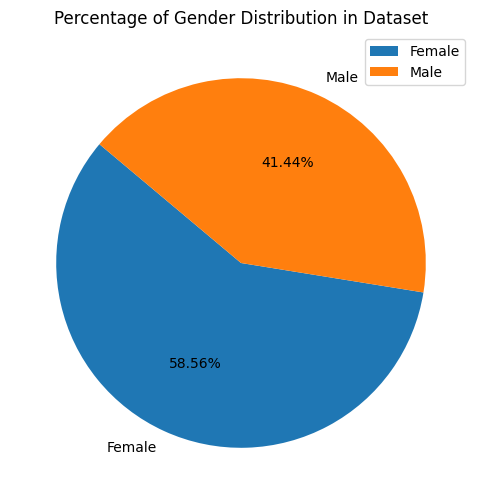

In [ ]:
# Count occurrences of each gender category
gender_counts = df['gender'].value_counts()

# Data for the pie chart
labels = gender_counts.index.tolist()  # Extract unique gender labels
sizes = gender_counts.values  # Extract corresponding counts
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Assign colors
explode = (0, 0, 0.1) if 'Other' in labels else (0, 0)  # Slightly separate 'Other' if it exists

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Gender Distribution in Dataset")
plt.legend(labels, loc="upper right")
plt.show()

The dataset has 58.56% Female individuals, which forms the majority.

####Age####

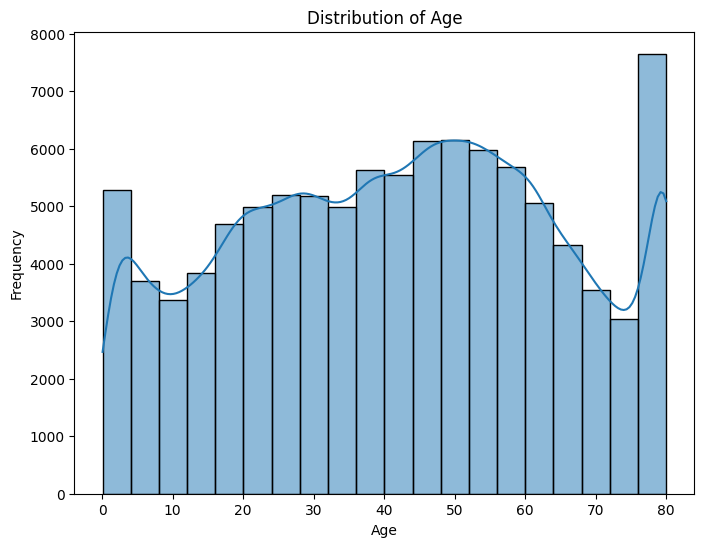

In [ ]:
# prompt: age

import matplotlib.pyplot as plt
#age
# Create a histogram of the 'age' column
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True) # kde=True adds a kernel density estimate curve
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**The dataset includes all age groups, ensuring diversity in the sample.The age distribution is fairly even.There's a higher frequency of individuals near age 80.**


####Hypertension####

In [ ]:
# prompt: hypertension
df['hypertension'].value_counts()


,count
hypertension,
0,92497
1,7485


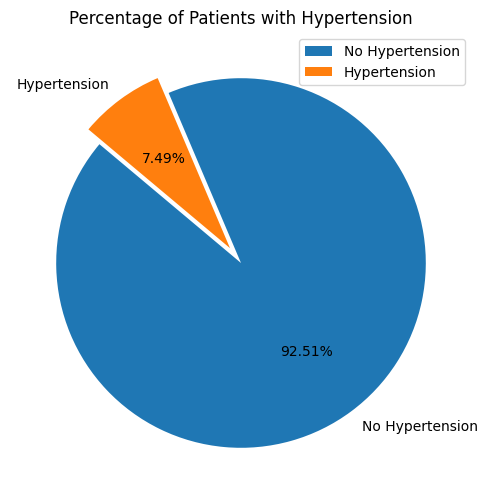

In [ ]:
# Count occurrences of each hypertension category
hypertension_counts = df['hypertension'].value_counts()

# Data for the pie chart
labels = ['No Hypertension', 'Hypertension']
sizes = [hypertension_counts[0], hypertension_counts[1]]  # Extract counts
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Hypertension" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Patients with Hypertension")
plt.legend(labels, loc="upper right")
plt.show()

**Hypertension is relatively rare in the dataset, with only about 7.03% of individuals affected**

####Heart Disease####

In [ ]:
# prompt: heart_disease
df['heart_disease'].value_counts()

,count
heart_disease,
0,96040
1,3942


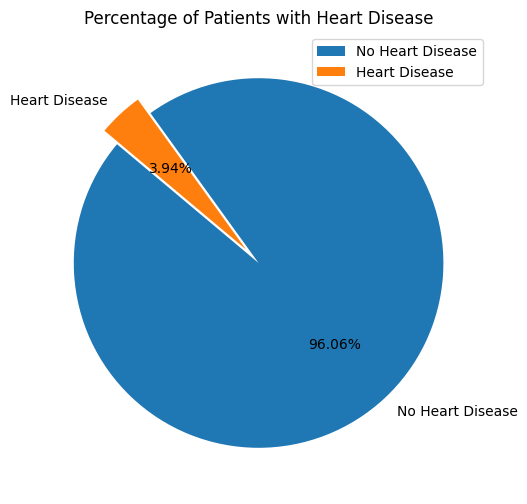

In [ ]:
# Count occurrences of each heart disease category
heart_disease_counts = df['heart_disease'].value_counts()

# Data for the pie chart
labels = ['No Heart Disease', 'Heart Disease']
sizes = [heart_disease_counts[0], heart_disease_counts[1]]  # Extract counts
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Heart Disease" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Patients with Heart Disease")
plt.legend(labels, loc="upper right")
plt.show()

**Heart disease is relatively rare in this dataset, with only ~3.91% of individuals affected.** This indicates a highly imbalanced dataset, which can negatively impact machine learning models. Possible Solutions are SMOTE, undersampling, or class weighting technique. Accuracy alone is not a good metric—F1-score, Precision-Recall, and AUC-ROC



####Smoke History####

In [ ]:
# Count occurrences of each smoking history category
smoking_counts = df['smoking_history'].value_counts().reset_index()
smoking_counts.columns = ['Smoking History', 'Count']

# Calculate frequency (percentage)
smoking_counts['Frequency (%)'] = (smoking_counts['Count'] / df.shape[0]) * 100

# Display the table
print(smoking_counts)

  Smoking History  Count  Frequency (%)
0         No Info  35816         35.816
1           never  35095         35.095
2          former   9352          9.352
3         current   9286          9.286
4     not current   6447          6.447
5            ever   4004          4.004


**35.81% of the records have no smoking history information.Former smokers (9.35%), current smokers (9.28%), and not current (6.44%) are relatively low.

In [ ]:
# Grouping smoking categories into broader groups (former, current, Not Current, and ever into one "Smoked" category).
df["smoking_grouped"] = df["smoking_history"].replace({
    "former": "Smoked",
    "current": "Smoked",
    "ever": "Smoked",
    "never": "Never Smoked",
    "not current": "Smoked",
    "No Info": "Unknown"
})

# Count occurrences of each new category
smoking_counts = df["smoking_grouped"].value_counts().reset_index()
smoking_counts.columns = ["Smoking Group", "Count"]

# Calculate percentage
smoking_counts["Frequency (%)"] = (smoking_counts["Count"] / df.shape[0]) * 100

# Display the results
print(smoking_counts)

  Smoking Group  Count  Frequency (%)
0       Unknown  35816         35.816
1  Never Smoked  35095         35.095
2        Smoked  29089         29.089


**Smoked" category (29.09%) Includes former, current, and ever smokers**

####BMI####

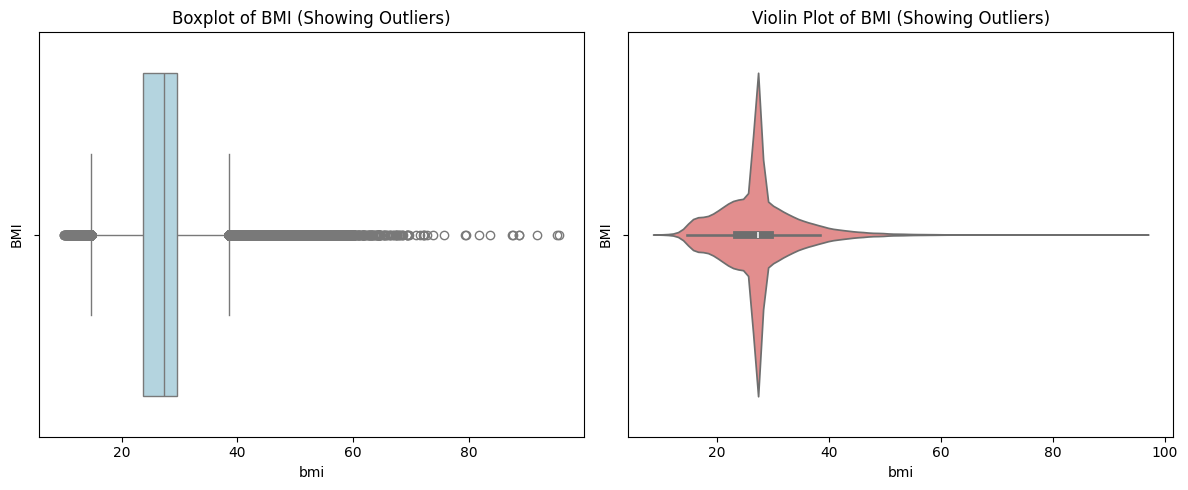

In [ ]:
# prompt: BMI
#print(df.head())

# Set figure size
plt.figure(figsize=(12, 5))

# Create a boxplot for BMI to show outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.boxplot(x=df['bmi'], color='lightblue')
plt.title("Boxplot of BMI (Showing Outliers)")
plt.ylabel("BMI")

# Create a violin plot for BMI to show distribution and outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.violinplot(x=df['bmi'], color='lightcoral')
plt.title("Violin Plot of BMI (Showing Outliers)")
plt.ylabel("BMI")

# Show the plots
plt.tight_layout()
plt.show()


Boxplot: Most BMI values fall between 15 to 35.The median BMI (center line in the box) appears around 25-30. Outliers extend far beyond the usual BMI range

Violin Plot: The most common BMI values (likely between 20 and 30). The long tails suggest the presence of extreme values.



count    100000.000000
mean         26.991686
std           5.671428
min          14.705000
25%          23.630000
50%          27.320000
75%          29.580000
max          38.505000
Name: bmi, dtype: float64
count    100000.000000
mean         26.991686
std           5.671428
min          14.705000
25%          23.630000
50%          27.320000
75%          29.580000
max          38.505000
Name: bmi, dtype: float64


<Axes: xlabel='bmi'>

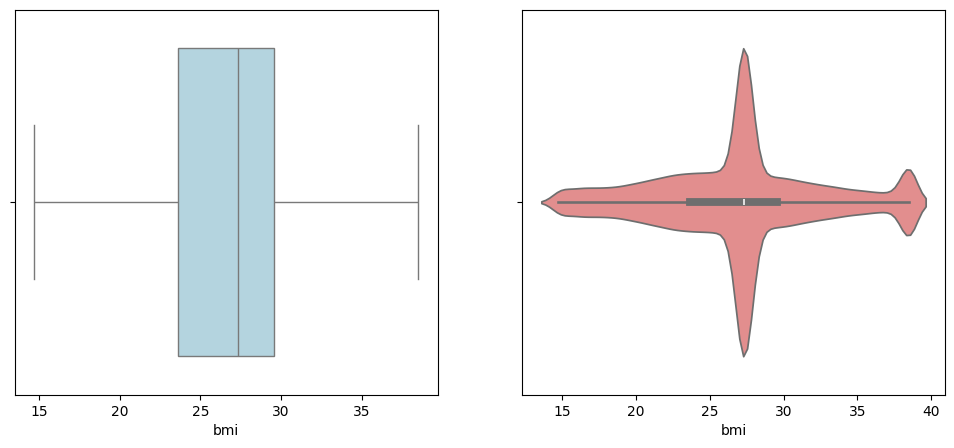

In [ ]:
# It is clear from the plot that, there are outliers which we need to remove.
# 1.  first calculation IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['bmi'] = df['bmi'].clip(lower=lower_bound, upper=upper_bound)

# Set figure size
plt.figure(figsize=(12, 5))

# Create a violin plot for BMI to show distribution and outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
# Verify changes
print(df['bmi'].describe())
sns.violinplot(data = df, x = 'bmi', color='lightcoral');

# Create a boxplot for BMI to show outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
# Verify changes
print(df['bmi'].describe())
sns.boxplot(x=df['bmi'], color='lightblue')





####HbA1c_level ####

In [ ]:
# prompt: HbA1c_level

# Get the range of HbA1c levels
hbA1c_min = df['HbA1c_level'].min()
hbA1c_max = df['HbA1c_level'].max()

# Define HbA1c categories
hbA1c_bins = [0, 5.7, 6.4, float('inf')]
hbA1c_labels = ['≤ 5.7% (Non-Diabetic)', '5.7% - 6.4% (Prediabetic)', '≥ 6.5% (Diabetic)']

# Categorize patients based on HbA1c levels
df['HbA1c_Category'] = pd.cut(df['HbA1c_level'], bins=hbA1c_bins, labels=hbA1c_labels, include_lowest=True)

# Count occurrences in each category
hbA1c_counts = df['HbA1c_Category'].value_counts().reset_index()
hbA1c_counts.columns = ['HbA1c Category', 'Count']

# Calculate percentage
hbA1c_counts['Percentage (%)'] = (hbA1c_counts['Count'] / df.shape[0]) * 100

# Display the results
print(f"HbA1c levels range from {hbA1c_min}% to {hbA1c_max}%.\n")
print(hbA1c_counts)


HbA1c levels range from 3.5% to 9.0%.

              HbA1c Category  Count  Percentage (%)
0      ≤ 5.7% (Non-Diabetic)  46270          46.270
1  5.7% - 6.4% (Prediabetic)  32933          32.933
2          ≥ 6.5% (Diabetic)  20797          20.797


**categorizes HbA1c levels into Non-Diabetic, Prediabetic, and Diabetic groups and calculates their proportions**

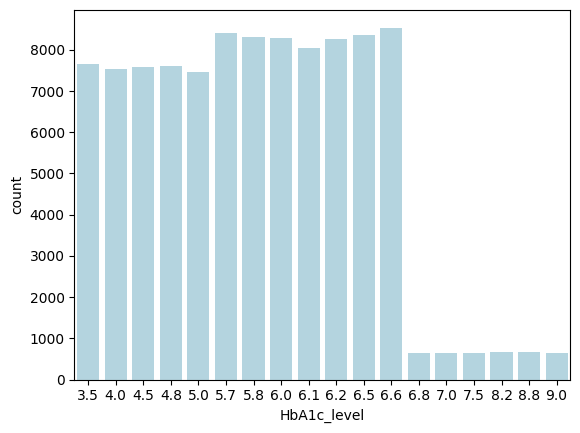

In [ ]:
# HbA1c_level :
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = df['HbA1c_level'], color='lightblue');

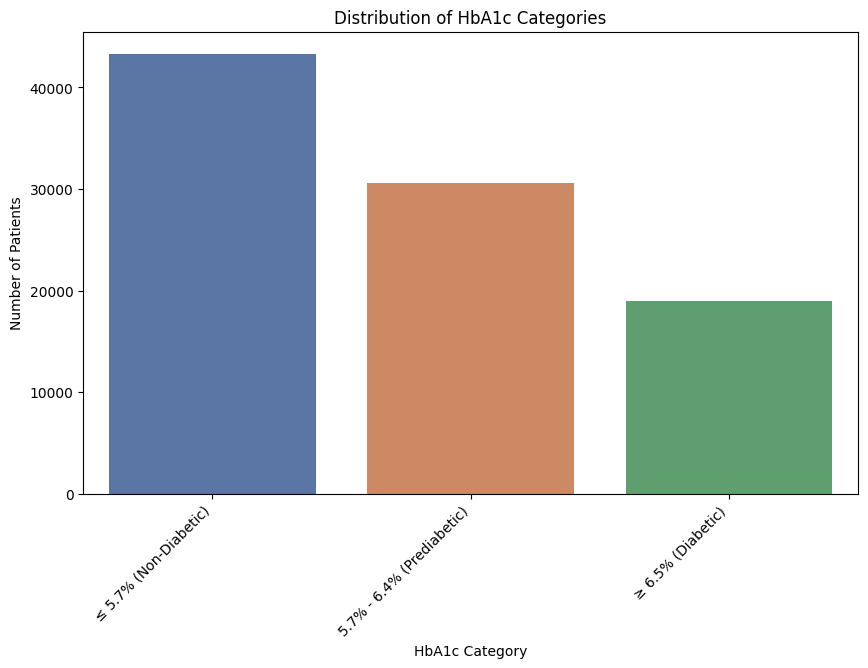

In [ ]:
import matplotlib.pyplot as plt
# Plotting the histogram for HbA1c Categories (American Diabetes Association - ADA) link https://diabetes.org/about-diabetes/diagnosis?utm_source=chatgpt.com
plt.figure(figsize=(10, 6))
sns.countplot(x='HbA1c_Category', data=df, hue='HbA1c_Category', palette='deep', legend=False)  # Set hue and legend
plt.title('Distribution of HbA1c Categories')
plt.xlabel('HbA1c Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


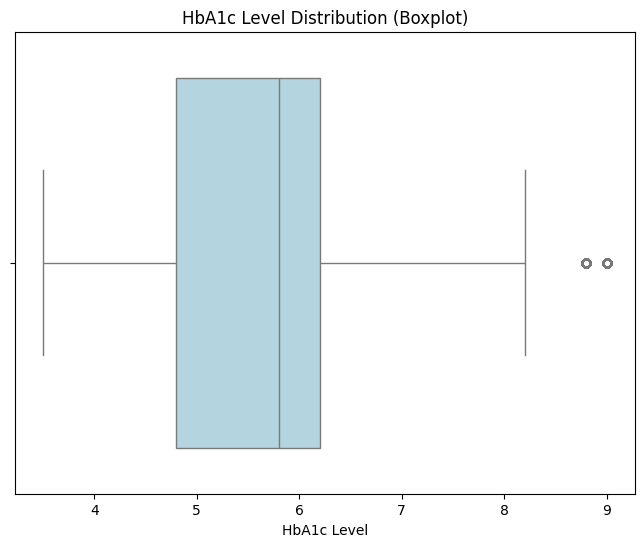

In [ ]:
# Plot a boxplot for HbA1c level distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['HbA1c_level'], color="lightblue")
plt.title("HbA1c Level Distribution (Boxplot)")
plt.xlabel("HbA1c Level")
plt.show()

####Blood Glucose Level ####

In [ ]:
# Count occurrences of each Blood Glucose Level
blood_glucose_distribution = df['blood_glucose_level'].value_counts().reset_index()
blood_glucose_distribution.columns = ['Blood Glucose Level', 'Count']

# Display the distribution table
print(blood_glucose_distribution)

    Blood Glucose Level  Count
0                   130   7794
1                   159   7759
2                   140   7732
3                   160   7712
4                   126   7702
5                   145   7679
6                   200   7600
7                   155   7575
8                    90   7112
9                    80   7106
10                  158   7026
11                  100   7025
12                   85   6901
13                  280    729
14                  300    674
15                  240    636
16                  260    635
17                  220    603


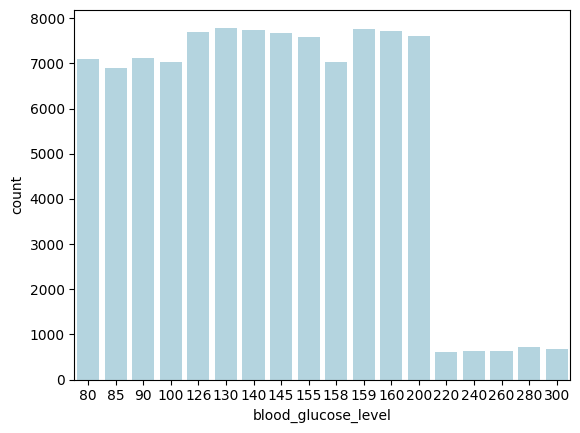

In [ ]:
#prompt: blood_glucose_level
sns.countplot(data = df, x = df['blood_glucose_level'], color = 'lightblue'); # Enclose 'lightblue' in quotes

####Target variable diabetes####

In [13]:
#Target variable diabetes
labels = list(df['diabetes'].value_counts().index)
num_var = list(df['diabetes'].value_counts().values)
print(labels)

[0, 1]


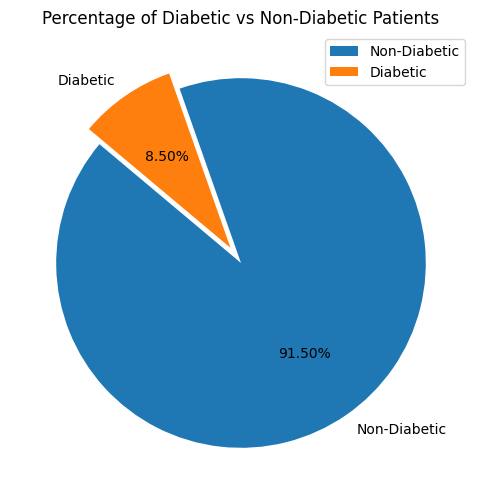

In [14]:
# Count occurrences of diabetic vs non-diabetic cases
diabetes_counts = df['diabetes'].value_counts().to_dict()  # Convert to dictionary to avoid KeyError

# Ensure both labels exist in the correct order
sizes = [diabetes_counts.get(0, 0), diabetes_counts.get(1, 0)]  # Handles cases where values might be missing
labels = ['Non-Diabetic', 'Diabetic']
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for clarity
explode = (0, 0.1)  # Slightly separate "Diabetic" slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Percentage of Diabetic vs Non-Diabetic Patients")
plt.legend(labels, loc="upper right")
plt.show()


**Given that diabetic cases about 8% of the dataset (high imbalance), the best approach should enhance the minority class representation.

Method 1: oversampling with SMOTE.

Method 2: Class Weight Adjustment in Models helps the model give more importance to the minority class.

Method 3: Use Recall & F1 Score for Model Evaluation (recall to ensure diabetic cases are detected and F1-score to balance precision & recall (instead of accuracy)**



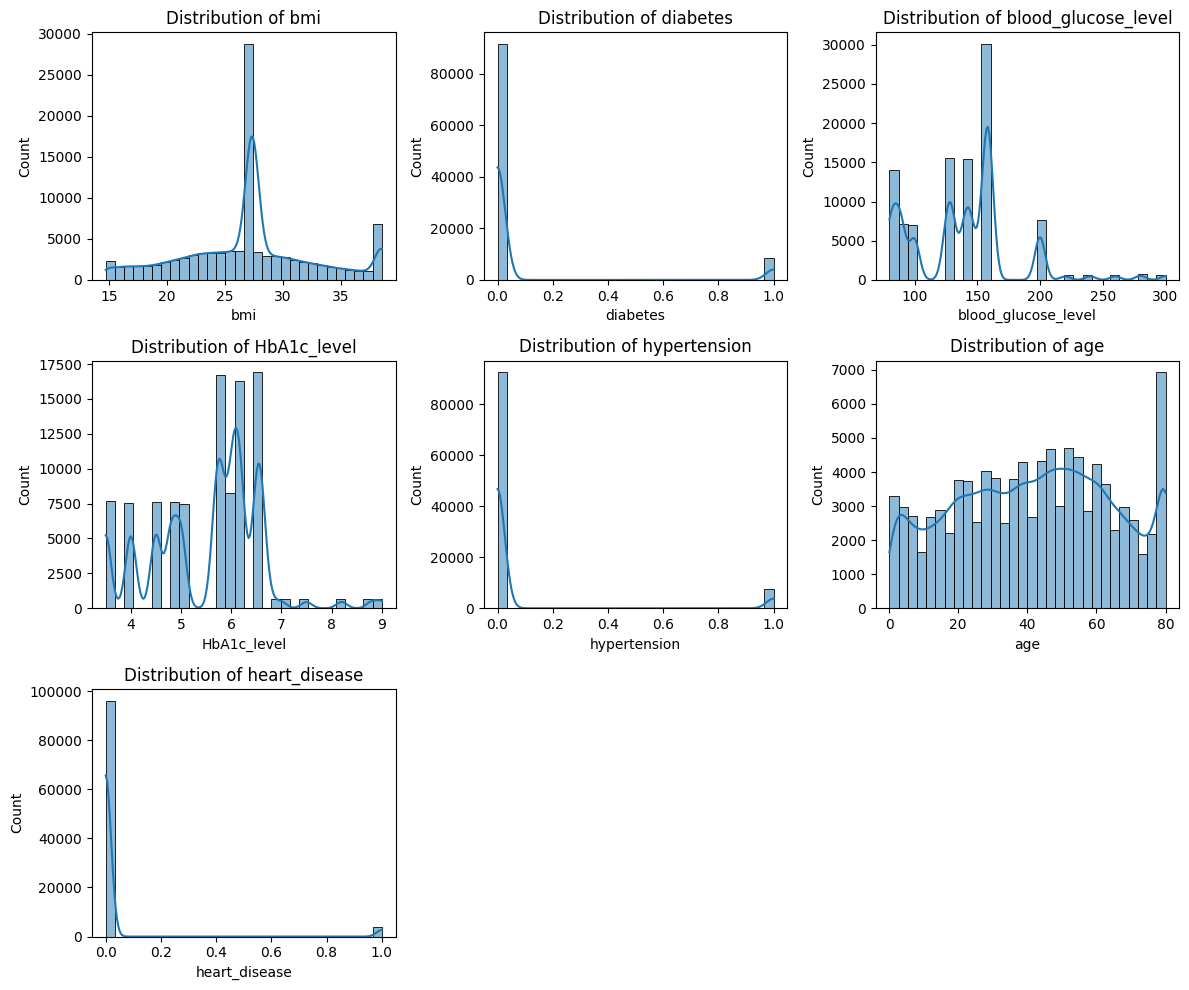

In [ ]:
# Distribution plots for all variables
variables = ['bmi', 'diabetes', 'blood_glucose_level', 'HbA1c_level', 'hypertension', 'age', 'heart_disease']
plt.figure(figsize=(12, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

Blood Glucose is multi-modal distribution.

BMI is right-skewed distribution.

HbA1c Level is uneven distribution.

The age distribution appears relatively uniform but with peaks around 60-80 years. A higher count of older individuals suggests a dataset focused on age-related health conditions.

There is a notable imbalance, with far fewer cases of heart disease.

## II. Bivariate Analysis

**In this section, the relationships between two variables and if possible, create new features combining them for better visualization**

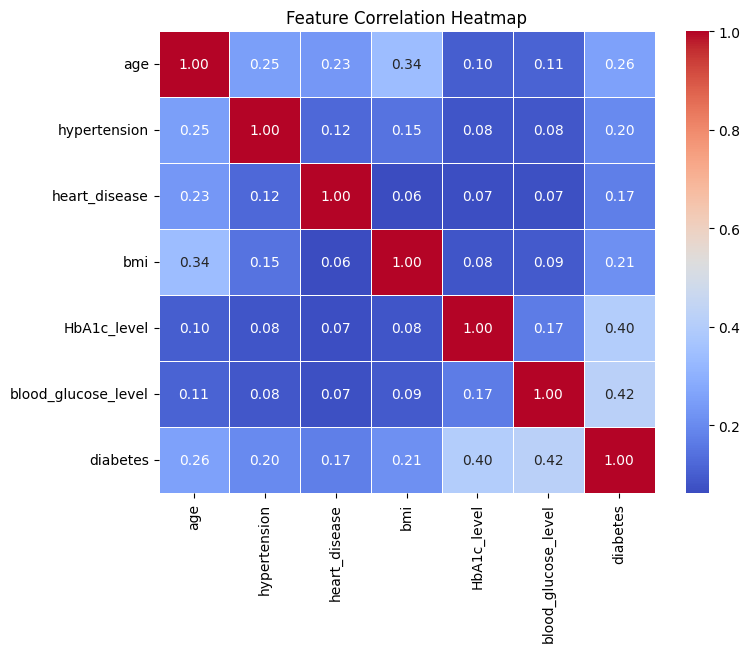

In [15]:
#Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Diabetes Correlation:

Blood Glucose Level (0.42): Strongest correlation - diabetes is diagnosed based on high blood sugar.

HbA1c Level (0.40): Strong correlation - HbA1c reflects long-term blood glucose levels.

Age (0.26):Moderate correlations

Hypertension (0.20):Moderate correlations

BMI (0.21): Moderate correlations

### 1. HbA1c_level vs. diabetes:

**Question: What percentage of individuals with HbA1c levels above 6.5% have diabetes?**

HbA1c_level

A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.
we will create a new feature bassed on the value of (HbA1C)

HbA1c level	initial diagnosis
1. < 5.7	Normal
2. 5.7 – 6.4	Prediabetes
3. greater or equal 6.5	Diabetes

Resource : https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [ ]:
# Calculate percentage of individuals with HbA1c > 6.5% who have diabetes

diabetic_hba1c = df[(df['HbA1c_level'] > 6.5) & (df['diabetes'] == 1)].shape[0]
total_hba1c_above_6_5 = df[df['HbA1c_level'] > 6.5].shape[0]

if total_hba1c_above_6_5 > 0:
    percentage_diabetic_hba1c = (diabetic_hba1c / total_hba1c_above_6_5) * 100
    print(f"Percentage of individuals with HbA1c > 6.5% who have diabetes: {percentage_diabetic_hba1c:.2f}%")
else:
    print("No individuals with HbA1c > 6.5% in the dataset.")

Percentage of individuals with HbA1c > 6.5% who have diabetes: 36.82%


The dataset **HbA1c_level** value increases, number of records with diabetes increases ## specially when it >= 6.5

In [ ]:
# Define HbA1c level categories based on diabetes classification
hba1c_bins = [0, 5.7, 6.4, float('inf')]
hba1c_labels = ['Normal', 'Prediabetes', 'Diabetes']
df['HbA1c_Category'] = pd.cut(df['HbA1c_level'], bins=hba1c_bins, labels=hba1c_labels)

# Calculate percentage of diabetics in each HbA1c category
hba1c_diabetes_counts = df.groupby('HbA1c_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
hba1c_table = pd.DataFrame({
    'HbA1c Level Category': hba1c_labels,
    'Prediction': [f"{hba1c_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in hba1c_labels]
})

# Display the table
print(hba1c_table)


  HbA1c Level Category            Prediction
0               Normal   1.52% have diabetes
1          Prediabetes   7.91% have diabetes
2             Diabetes  24.96% have diabetes


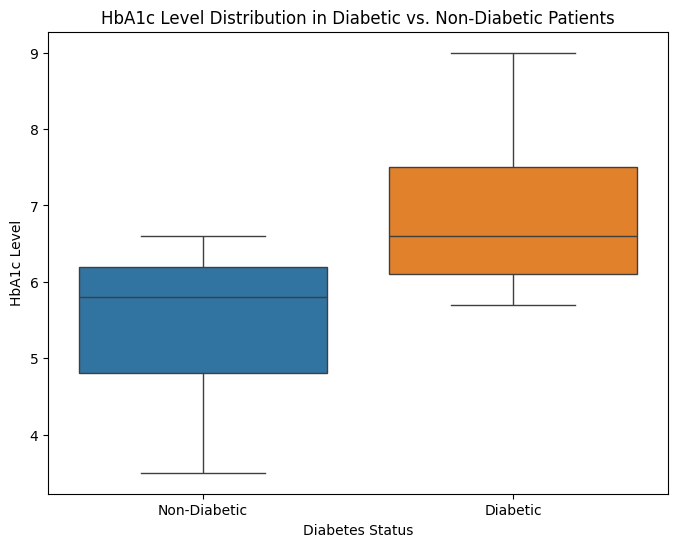

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="diabetes", y="HbA1c_level", data=df, hue="diabetes", palette={0: "#1f77b4", 1: "#ff7f0e"}, legend=False)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title("HbA1c Level Distribution in Diabetic vs. Non-Diabetic Patients")
plt.xlabel("Diabetes Status")
plt.ylabel("HbA1c Level")
plt.show()


### 2. bmi vs diabetes:

**Question: Does BMI above 30 increase the likelihood of diabetes by more than 50% compared to normal-weight individuals?**

BMI	Category
*   =< 18.5	Underweight
*   18.5 – 24.9	Normal
*   25 – 29.9	Overweight
*   Greater than 30	Obesity

https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test https://www.cdc.gov/diabetes/basics/getting-tested.html

In [ ]:
# Compute correlation matrix using actual column names
correlation_matrix = df[['bmi', 'diabetes', 'blood_glucose_level', 'HbA1c_level']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                           bmi  diabetes  blood_glucose_level  HbA1c_level
bmi                  1.000000  0.209656             0.090439     0.081466
diabetes             0.209656  1.000000             0.419558     0.400660
blood_glucose_level  0.090439  0.419558             1.000000     0.166733
HbA1c_level          0.081466  0.400660             0.166733     1.000000


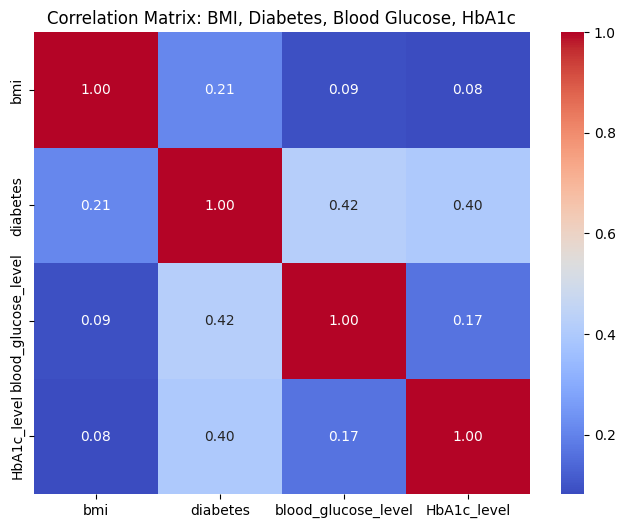

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: BMI, Diabetes, Blood Glucose, HbA1c")
plt.show()

In [ ]:
# Define obesity threshold
df['Obese'] = df['bmi'] > 30
# Calculate diabetes risk for obese vs. non-obese
obese_diabetes_rate = df[df['Obese']]['diabetes'].mean()
non_obese_diabetes_rate = df[~df['Obese']]['diabetes'].mean()
print(f"Diabetes rate in obese individuals: {obese_diabetes_rate:.2%}")
print(f"Diabetes rate in non-obese individuals: {non_obese_diabetes_rate:.2%}")

Diabetes rate in obese individuals: 18.02%
Diabetes rate in non-obese individuals: 5.58%


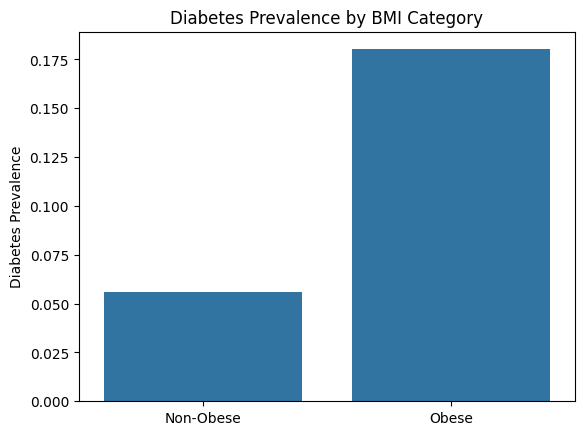

In [ ]:
# Visualizing diabetes prevalence in obese vs. non-obese groups
sns.barplot(x=['Non-Obese', 'Obese'], y=[non_obese_diabetes_rate, obese_diabetes_rate])
plt.ylabel("Diabetes Prevalence")
plt.title("Diabetes Prevalence by BMI Category")
plt.show()


In [ ]:
# Define BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['BMI_Category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

# Calculate percentage of diabetics in each BMI category
bmi_diabetes_counts = df.groupby('BMI_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
bmi_table = pd.DataFrame({
    'BMI Category': bmi_labels,
    'Prediction': [f"{bmi_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in bmi_labels]
})

# Display the table
print(bmi_table)


  BMI Category            Prediction
0  Underweight   0.75% have diabetes
1       Normal   3.84% have diabetes
2   Overweight   7.25% have diabetes
3      Obesity  17.91% have diabetes


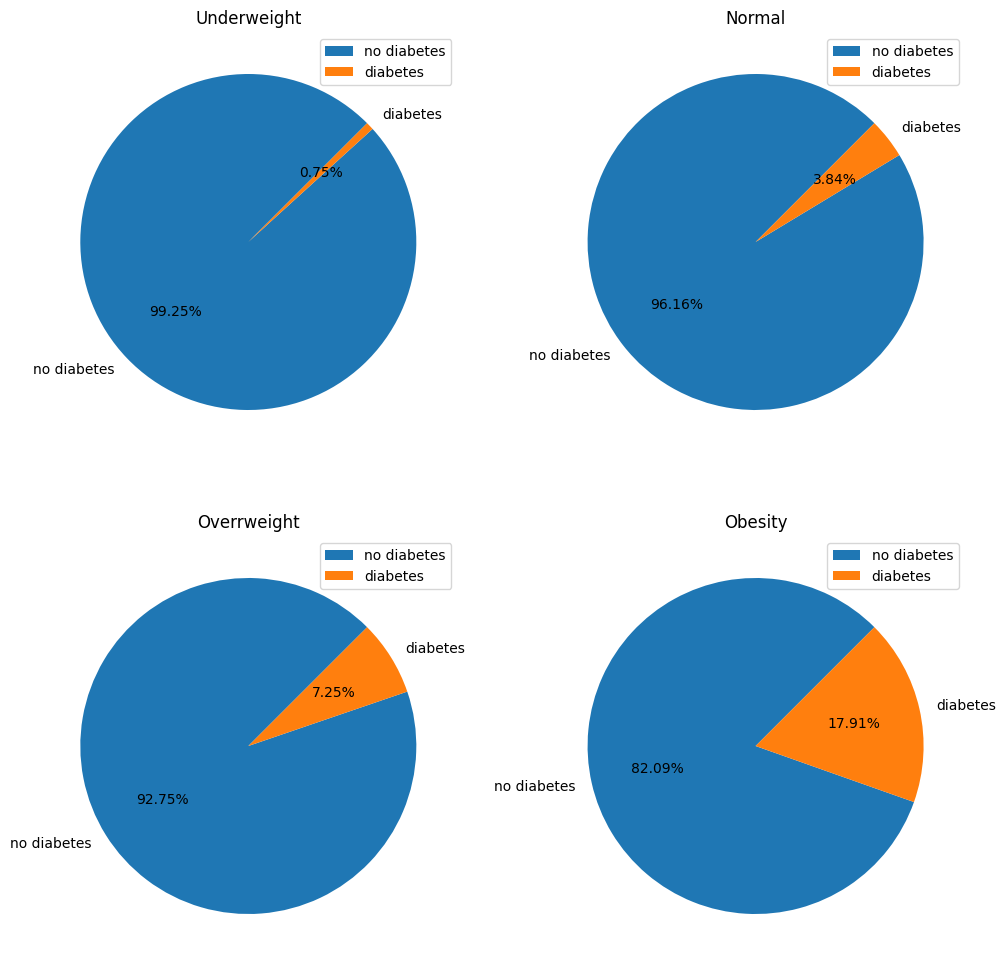

In [ ]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [12,12]);

# Assuming 'bmi' is used to determine weight type
# Define BMI categories and corresponding weight types
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
weight_types = ['Underweight', 'Normal', 'Overweight', 'Obesity']

# Create a new 'weight_type' column based on BMI categories
df['weight_type'] = pd.cut(df['bmi'], bins=bmi_bins, labels=weight_types, include_lowest=True)

plt.subplot(2,2,1);
plt.pie(df[df['weight_type'] == 'Underweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('Underweight')
plt.legend();

plt.subplot(2,2,2);
plt.pie(df[df['weight_type'] == 'Normal']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Normal')
plt.legend();

plt.subplot(2,2,3);
plt.pie(df[df['weight_type'] == 'Overweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Overrweight')
plt.legend();

plt.subplot(2,2,4);
plt.pie(df[df['weight_type'] == 'Obesity']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Obesity')
plt.legend();

### 3. blood_glucose_level vs diabetes

**Question: What is the mean blood glucose level for diabetic vs. non-diabetic individuals?**

<b>blood_glucose_level </b>

| blood_glucose_level | Category |
|------|------|
| =< 99 | normal|
| 100 – 125| Prediabetes|
| >= 126 | Diabetes|

<b> Resources : </b>
<a>  https://www.cdc.gov/diabetes/basics/getting-tested.html </a>



In [ ]:
# Calculate mean blood glucose level for diabetic vs. non-diabetic individuals
mean_glucose_diabetic = df[df['diabetes'] == 1]['blood_glucose_level'].mean()
mean_glucose_non_diabetic = df[df['diabetes'] == 0]['blood_glucose_level'].mean()

print(f"Mean Blood Glucose Level for Diabetic Individuals: {mean_glucose_diabetic:.2f}")
print(f"Mean Blood Glucose Level for Non-Diabetic Individuals: {mean_glucose_non_diabetic:.2f}")

Mean Blood Glucose Level for Diabetic Individuals: 194.09
Mean Blood Glucose Level for Non-Diabetic Individuals: 132.85


In [ ]:
# Calculate mean blood glucose level for diabetic vs. non-diabetic individuals
median_glucose_diabetic = df[df['diabetes'] == 1]['blood_glucose_level'].median()
median_glucose_non_diabetic = df[df['diabetes'] == 0]['blood_glucose_level'].median()

print(f"median Blood Glucose Level for Diabetic Individuals: {median_glucose_diabetic:.2f}")
print(f"median Blood Glucose Level for Non-Diabetic Individuals: {median_glucose_non_diabetic:.2f}")

median Blood Glucose Level for Diabetic Individuals: 160.00
median Blood Glucose Level for Non-Diabetic Individuals: 140.00


In [ ]:
# Define Blood Glucose Level categories
glucose_bins = [0, 99, 125, float('inf')]
glucose_labels = ['≤ 99', '100 – 125', '≥ 126']
df['Glucose_Category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Calculate percentage of diabetics in each Blood Glucose Level category
glucose_diabetes_counts = df.groupby('Glucose_Category', observed=True)['diabetes'].mean() * 100

# Create a structured table
glucose_table = pd.DataFrame({
    'Blood Glucose Level': glucose_labels,
    'Prediction': [f"{glucose_diabetes_counts.get(category, 0):.2f}% have diabetes" for category in glucose_labels]
})

# Display the table
print(glucose_table)



  Blood Glucose Level            Prediction
0                ≤ 99   0.00% have diabetes
1           100 – 125   0.00% have diabetes
2               ≥ 126  11.83% have diabetes


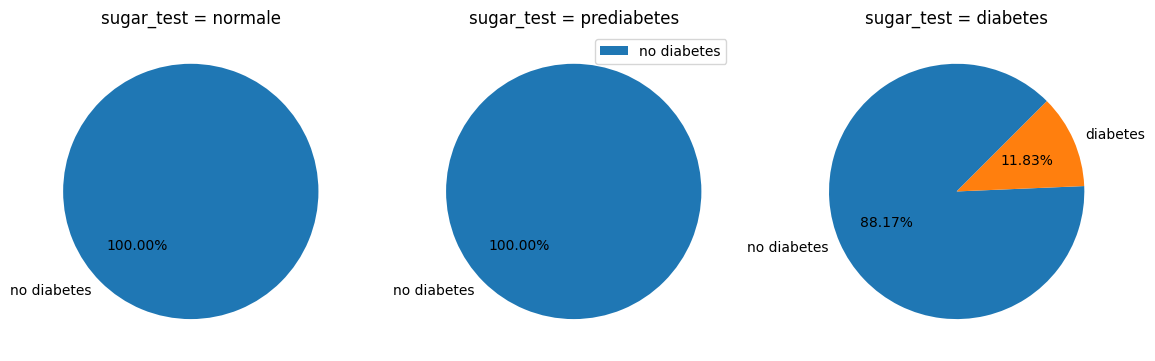

In [ ]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [14,8]);

# Assuming you want to create 'sugar_test' based on 'blood_glucose_level'
# Define Blood Glucose Level categories and corresponding sugar_test labels
glucose_bins = [0, 99, 125, float('inf')]
sugar_test_labels = ['normal', 'prediabetes', 'diabetes']

# Create a new 'sugar_test' column
df['sugar_test'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=sugar_test_labels, include_lowest=True)

plt.subplot(1,3,1);
plt.pie(df[df['sugar_test'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = normale');

plt.subplot(1,3,2);
plt.pie(df[df['sugar_test'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['sugar_test'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('sugar_test = diabetes');

**all patients with diabetes have high sugar test result ( > 126)**

In [ ]:
# Step 1: Calculate percentage of diabetic patients in specific blood glucose ranges
patients_126_200 = df[(df['blood_glucose_level'] >= 126) & (df['blood_glucose_level'] <= 200)]
diabetes_rate_126_200 = (patients_126_200['diabetes'].sum() / len(patients_126_200)) * 100

patients_220_above = df[df['blood_glucose_level'] >= 220]
diabetes_rate_220_above = (patients_220_above['diabetes'].sum() / len(patients_220_above)) * 100

# Step 2: Estimate cost of diabetes
cost_per_patient = 9600  # Example: Annual cost of diabetes treatment per patient in USD (adjustable)
total_diabetic_patients = df[df['diabetes'] == 1].shape[0]
total_diabetes_cost = total_diabetic_patients * cost_per_patient

# Print results
print(f"Percentage of diabetic patients with blood glucose between 126-200 mg/dL: {diabetes_rate_126_200:.2f}%")
print(f"Percentage of diabetic patients with blood glucose ≥ 220 mg/dL: {diabetes_rate_220_above:.2f}%")
print(f"Total estimated cost of diabetes for dataset: ${total_diabetes_cost:,.2f}")


Percentage of diabetic patients with blood glucose between 126-200 mg/dL: 100.00%
Percentage of diabetic patients with blood glucose ≥ 220 mg/dL: 100.00%
Total estimated cost of diabetes for dataset: $96,000.00


In [ ]:
# isolate record with 'blood_glucose_level' values >= 126.
high_sugar_result = df[df['blood_glucose_level'] >= 126]

# counts number of patients have diabetes.
counts  = pd.DataFrame(high_sugar_result.groupby(['blood_glucose_level'])['diabetes'].sum())

# create a columns with total number of patients and the percentage of them who have diabetes
counts['total'] = high_sugar_result['blood_glucose_level'].value_counts().sort_index()
counts['percentage'] = round((counts['diabetes'] / counts['total'])*100,2)

counts = counts.reset_index()
counts

,blood_glucose_level,diabetes,total,percentage
0,126,636,7702,8.26
1,130,692,7794,8.88
2,140,625,7732,8.08
3,145,662,7679,8.62
4,155,599,7575,7.91
5,158,0,7026,0.00
6,159,666,7759,8.58
7,160,696,7712,9.02
8,200,647,7600,8.51
9,220,603,603,100.00


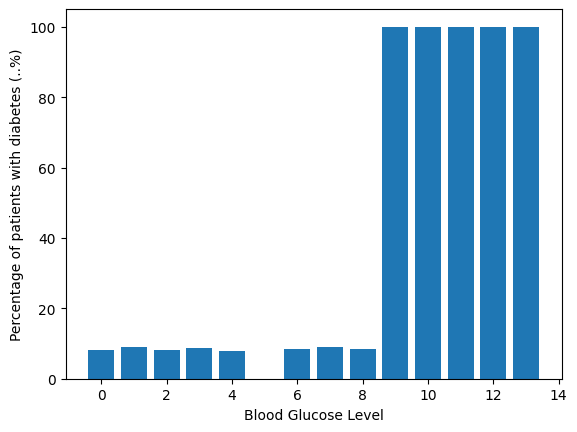

In [ ]:
# barplot for visual representation :
plt.bar(counts.index, counts['percentage']);
plt.xlabel('Blood Glucose Level');
plt.ylabel('Percentage of patients with diabetes (..%)');

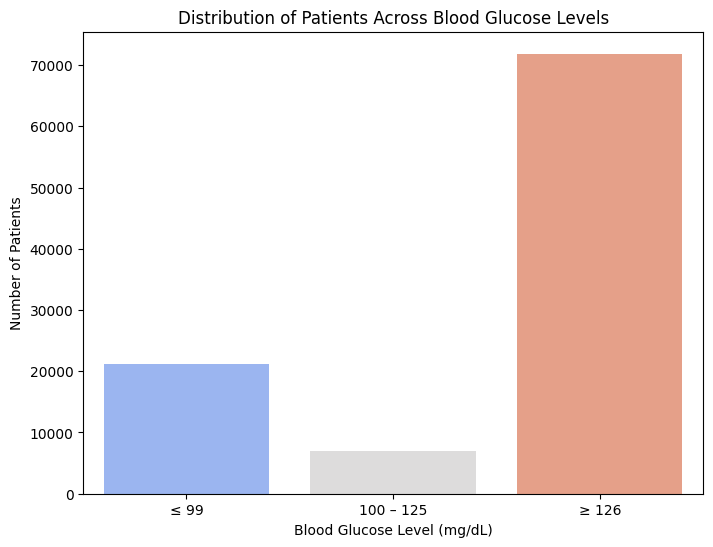

In [ ]:
# Define Blood Glucose Level categories
glucose_bins = [0, 99, 125, float('inf')]
glucose_labels = ['≤ 99', '100 – 125', '≥ 126']
df['Glucose_Category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

# Plot a bar chart for blood glucose categories (Fixing FutureWarning)
plt.figure(figsize=(8, 6))
sns.countplot(x="Glucose_Category", data=df, hue="Glucose_Category", palette="coolwarm", legend=False)
plt.title("Distribution of Patients Across Blood Glucose Levels")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Number of Patients")
plt.show()



#### all patients with diabetes have high sugar test result ( > 126)

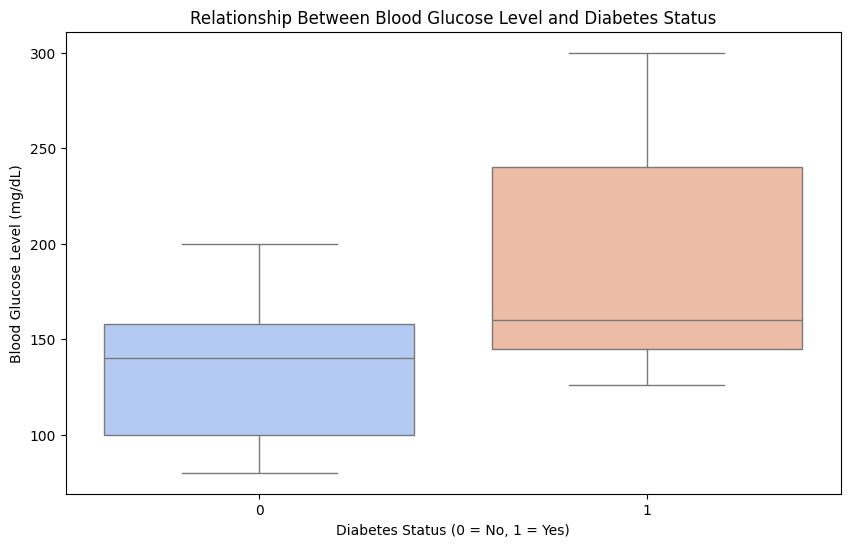

In [ ]:
# Plot the distribution of Blood Glucose Levels vs. Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['diabetes'], y=df['blood_glucose_level'], hue=df['diabetes'], palette="coolwarm", legend=False)

# Set plot labels and title
plt.title("Relationship Between Blood Glucose Level and Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Blood Glucose Level (mg/dL)")

# Show the plot
plt.show()


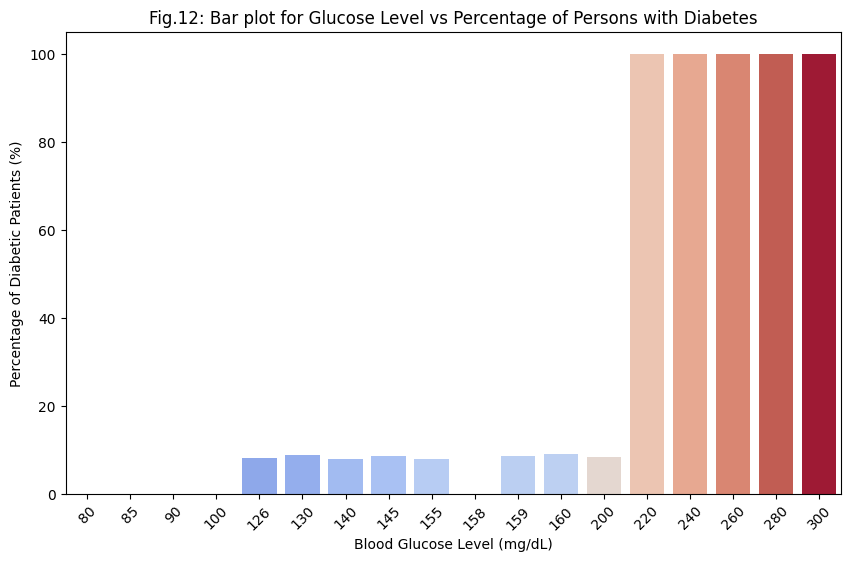

In [ ]:
# Group data by blood glucose level and count diabetes cases
blood_glucose_summary = df.groupby('blood_glucose_level').agg(
    diabetes=('diabetes', 'sum'),  # Count of diabetes cases
    total=('diabetes', 'count')  # Total instances per blood glucose level
).reset_index()

# Calculate the percentage of diabetes cases for each blood glucose level
blood_glucose_summary['percentage'] = (blood_glucose_summary['diabetes'] / blood_glucose_summary['total']) * 100

# Create a bar plot for Blood Glucose Level vs Percentage of Persons with Diabetes (Fixing FutureWarning)
plt.figure(figsize=(10, 6))
sns.barplot(x="blood_glucose_level", y="percentage", data=blood_glucose_summary, hue="blood_glucose_level", palette="coolwarm", legend=False)

# Customize the plot
plt.title("Fig.12: Bar plot for Glucose Level vs Percentage of Persons with Diabetes")
plt.xlabel("Blood Glucose Level (mg/dL)")
plt.ylabel("Percentage of Diabetic Patients (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


* Patients with **['blood_glucose_level']** between **126 to 200** , around 7.5 of them have already diabetes and that whose **['blood_glucose_level'] >= 220** , all of then have accually diabetes .

### 4. hypertension vs bmi

In [ ]:
# Question: What is the average BMI for individuals with and without hypertension?
mean_bmi_hypertension = df[df['hypertension'] == 1]['bmi'].mean()
mean_bmi_no_hypertension = df[df['hypertension'] == 0]['bmi'].mean()

print(f"Mean BMI for individuals with Hypertension: {mean_bmi_hypertension:.2f}")
print(f"Mean BMI for individuals without Hypertension: {mean_bmi_no_hypertension:.2f}")

In [ ]:
# Question: What is the median BMI for individuals with and without hypertension?
median_bmi_hypertension = df[df['hypertension'] == 1]['bmi'].median()
median_bmi_no_hypertension = df[df['hypertension'] == 0]['bmi'].median()

print(f"Median BMI for individuals with Hypertension: {median_bmi_hypertension:.2f}")
print(f"Median BMI for individuals without Hypertension: {median_bmi_no_hypertension:.2f}")

In [ ]:
sns.boxplot(x=df['hypertension'], y=df['bmi'])
plt.title("BMI Distribution by Hypertension Status")
plt.show()


### 5. Age vs Heart Disease

Age & Diabetes: 0.272 (Moderate correlation)

Age & Hypertension: 0.260 (Moderate correlation)

Age & Heart Disease: 0.266 (Moderate correlation)

In [ ]:
# Question: What is the median age of individuals with and without heart disease?
median_age_heart_disease = df[df['heart_disease'] == 1]['age'].median()
median_age_no_heart_disease = df[df['heart_disease'] == 0]['age'].median()

print(f"Median Age for individuals with Heart Disease: {median_age_heart_disease:.2f}")
print(f"Median Age for individuals without Heart Disease: {median_age_no_heart_disease:.2f}")


Median Age for individuals with Heart Disease: 70.00
Median Age for individuals without Heart Disease: 41.00


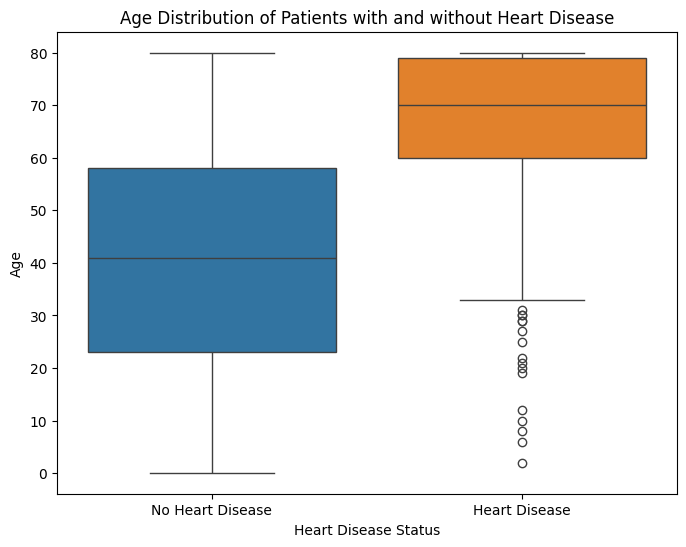

In [ ]:
# Comparing the age distribution of patients with and without heart disease.
# Create a boxplot to compare age distribution between patients with and without heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x="heart_disease", y="age", data=df, hue="heart_disease", palette={0: "#1f77b4", 1: "#ff7f0e"}, legend=False)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.title("Age Distribution of Patients with and without Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Age")
plt.show()




#Hypothesis Testing

####T-test: Compare blood glucose levels between diabetic and non-diabetic individuals.

Use a T-Test when:
Target (diabetic vs. non-diabetic patients).
Continuous variable (e.g., blood glucose levels, BMI, HbA1c levels).

In [16]:
import scipy.stats as stats

glucose_diabetic = df[df['diabetes'] == 1]['blood_glucose_level']  # Use actual column names
glucose_non_diabetic = df[df['diabetes'] == 0]['blood_glucose_level']  # Use actual column names

t_stat, p_value_ttest = stats.ttest_ind(glucose_diabetic, glucose_non_diabetic, equal_var=False)

print(f"T-Test Results (Blood Glucose vs Diabetes):")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value_ttest:.4f}")
print("Significant Difference" if p_value_ttest < 0.05 else "No Significant Difference")
print("-" * 50)



T-Test Results (Blood Glucose vs Diabetes):
T-Statistic: 94.7949, P-Value: 0.0000
Significant Difference
--------------------------------------------------


**Since the p-value is much lower than 0.05, we reject the null hypothesis. There is a significant difference in blood glucose levels between diabetic and non-diabetic individuals. Blood glucose is a strong differentiator for diabetes.**

####Chi-Square Test: Check if hypertension and diabetes are significantly associated.

The Chi-Square Test is a statistical test used to determine whether there is a significant association between two categorical variables

In [17]:
contingency_table = pd.crosstab(df['hypertension'], df['diabetes'])
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Results (Hypertension vs Diabetes):")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {p_value_chi2:.4f}")
print("Significant Association" if p_value_chi2 < 0.05 else "No Significant Association")
print("-" * 50)



Chi-Square Test Results (Hypertension vs Diabetes):
Chi-Square Statistic: 3910.7085, P-Value: 0.0000
Significant Association
--------------------------------------------------


**There is strong statistical association between hypertension and diabetes. This means that individuals with hypertension are significantly more likely to have diabetes.**

#Predictive Modeling

# 5. Train-test split and standardized scaler

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
X = df[numerical_features].drop('diabetes', axis=1)
y = df['diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler only to numerical features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (80000, 6) 
y_train: (80000,)
X_test: (20000, 6) 
y_test: (20000,)


## **Logistic Regression Classifer**

In [19]:
## Designing Logistic Regeression Classifier
import numpy as np # Import numpy and assign it to the alias 'np'
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression class
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score # Import necessary metrics

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, LogReg_pred))
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)

In [208]:
## Designing Logistic Regeression Classifier
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, LogReg_pred))
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)

In [209]:
## Printing the results
from sklearn.metrics import classification_report # Import classification_report

print("The accuracy for Logistic Regression is", LogReg_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The accuracy for Logistic Regression is 0.95875
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



Observation: accuracy alone is not always the best metric when dealing with imbalanced datasets

Precision: When predicting "Diabetes," it's correct 86% of the time.

Recalls:The model correctly identifies only 61% of diabetics.

F1-Score (Balanced Precision & Recall)

* No Diabetes (0): 0.98 (Excellent balance).

* Diabetes (1): 0.72 (Moderate but could be improved).

Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

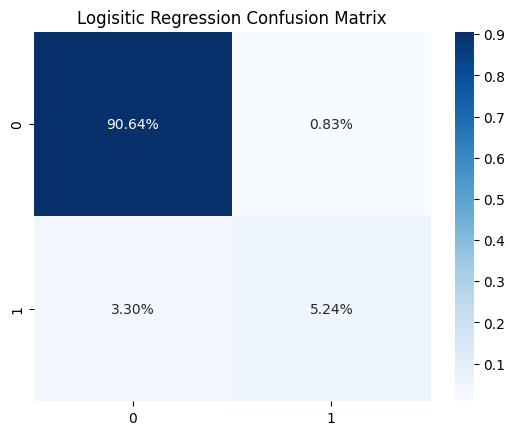

In [29]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Logisitic Regression Confusion Matrix")

Actual No Diabetes (0):
✔ 90.64% (True Negatives) → Correctly predicted as non-diabetic.
❌ 0.83% (False Positives) → Incorrectly predicted as diabetic.

Actual Diabetes (1):
❌ 3.30% (False Negatives) → Incorrectly predicted as non-diabetic.
✔ 5.24% (True Positives) → Correctly predicted as diabetic.

## K-Nearest Neighbour Regression Classifier

In [35]:
## Designing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_mae = mean_absolute_error(y_test, KNN_pred)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_rmse = np.sqrt(mean_squared_error(y_test, KNN_pred))
KNN_precision = precision_score(y_test, KNN_pred)
KNN_recall = recall_score(y_test, KNN_pred)
KNN_f1 = f1_score(y_test, KNN_pred)

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, classification_report

In [36]:
##Printing the results
print("The accuracy for KNeighbors is", KNN_acc)
print("The classification report using KNeighbors is:" ),
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 0.96625
The classification report using KNeighbors is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.92      0.66      0.77      1708

    accuracy                           0.97     20000
   macro avg       0.95      0.83      0.88     20000
weighted avg       0.97      0.97      0.96     20000



F1-Score:

No Diabetes (0): 0.98 (Excellent performance).

Diabetes (1): 0.77 (Better than Logistic Regression but still room for improvement).

## Decision Tree Classifier

In [37]:
##Designing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
DecTree_pred = DecTree.predict(X_test)
DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred)
DecTree_recall = recall_score(y_test, DecTree_pred)
DecTree_f1 = f1_score(y_test, DecTree_pred)

In [38]:
##Printing the results
print("The accuracy for Decision Tree is", DecTree_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree_pred))

The accuracy for Decision Tree is 0.9557
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18292
           1       0.74      0.74      0.74      1708

    accuracy                           0.96     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000



Better recall for diabetes compared to Logistic Regression (61%) and KNN (66%), meaning the model is less likely to miss actual diabetics.

F1-Score (Harmonic mean of Precision & Recall)
* No Diabetes (0): 0.98 (Excellent performance).
* Diabetes (1): 0.74 (Best so far compared to other models).

Balanced performance in identifying diabetes and non-diabetes cases.


## Random Forest Classifier

In [39]:
##Designing Randoom Forest Classifier
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)
RFTree_pred = RFTree.predict(X_test)
RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred)
RFTree_recall = recall_score(y_test, RFTree_pred)
RFTree_f1 = f1_score(y_test, RFTree_pred)

In [40]:
##Printing the results
print("The accuracy for Random Forest is", RFTree_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree_pred))

The accuracy for Random Forest is 0.96925
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.92      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



Recall: Improved recall for diabetics compared to Logistic Regression (61%) and KNN (66%), but slightly lower than Decision Tree (74%).

F1-Score (Harmonic mean of Precision & Recall)
* No Diabetes (0): 0.98 (Excellent performance).
* Diabetes (1): 0.79 (Best so far compared to other models).

Diabetes recall is still lower, meaning the model still misses some diabetics.




## Support Vector Machine Classifier

In [41]:
#Designing SVM Classifier
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)
SVM_f1 = f1_score(y_test, SVM_pred)

In [42]:
print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is 0.96335
The classification report using SVM is: 0.96335
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.58      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.86     20000
weighted avg       0.96      0.96      0.96     20000



Recall: 42% of actual diabetic cases were misclassified as non-diabetic (false negatives).

Diabetes recall is much lower than Random Forest (70%) and Decision Tree (74%).


# Comparison of Different Models

In [43]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector'],
    'Accuracy' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc],
    'Precision' :[LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision],
    'Recall' :[LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall],
    'F1 Score' :[LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1]
})


In [44]:
models

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.95875,0.863974,0.613583,0.717562
1,KNN Regression,0.96625,0.922322,0.660422,0.769703
2,Decision Tree,0.95570,0.738676,0.744731,0.741691
3,Random Forest,0.96925,0.918774,0.701991,0.795885
4,Support Vector,0.96335,0.978410,0.583724,0.731206


Random Forest: Best F1-score (0.7923), making it the strongest performer

KNN: High precision (92.2%), meaning it correctly identifies diabetics when predicted.

Logistic Regression is the Weakest in Precision & Recall Tradeoff


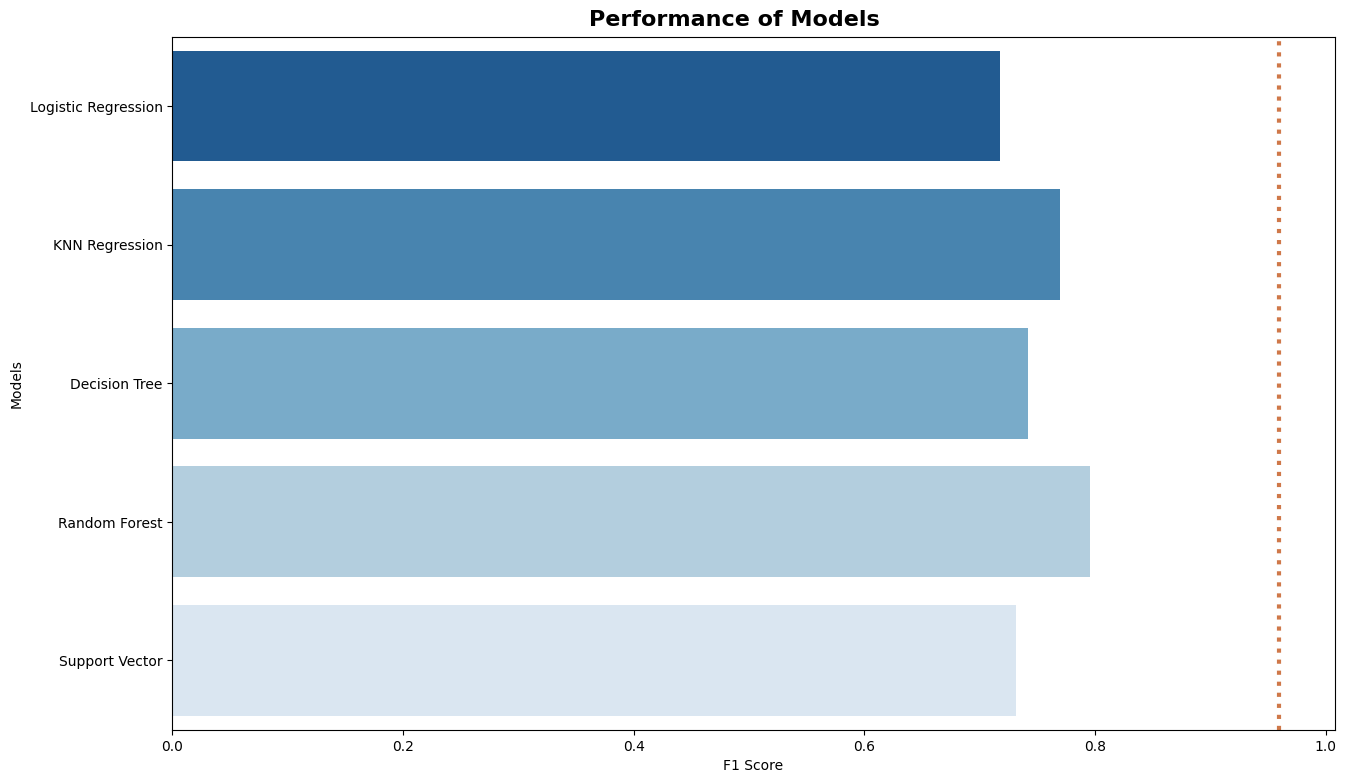

In [49]:
# Create figure
fig = plt.figure(figsize=(15, 9))

# Fixing the warning: Added hue='Model' and legend=False
ax = sns.barplot(data=models,
                 y='Model',
                 x='F1 Score',
                 hue='Model',        # Assigning 'hue' to fix warning
                 palette='Blues_r',
                 legend=False)       # Legend is redundant here

# Title and labels
ax.figure.suptitle('Performance of Models', y=0.91, size=16, color='black', weight='bold')
plt.xlabel('F1 Score')
plt.ylabel('Models')

# Add a reference vertical line for the threshold
plt.axvline(x=0.96, ymin=0, ymax=1,
            linewidth=3, linestyle=":",
            color='#cf7849')

plt.show()

## CROSS VALIDATION


**K-Fold Cross-Validation is used to ensure a model’s performance is reliable and not dependent on a single training/test split. Since F1-score is the most balanced metric for imbalanced datasets (like diabetes detection), by apply K-Fold Cross-Validation to the top 3 models with the highest F1-scores**


In [50]:
##Performing K-Fold cross Validation for 3 models performed better in F1-Score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

cv = KFold(n_splits=10, random_state=1, shuffle=True)

KNN_scores = cross_val_score(KNN, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
DecTree_scores = cross_val_score(DecTree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
RFTree_scores = cross_val_score(RFTree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy of CV - KNN: %.4f (%.4f)' % (mean(KNN_scores), stdev(KNN_scores)))
print('Accuracy of CV - Decision Tree: %.4f (%.4f)' % (mean(DecTree_scores), stdev(DecTree_scores)))
print('Accuracy of CV - Random Forest: %.4f (%.4f)' % (mean(RFTree_scores), stdev(RFTree_scores)))

Accuracy of CV - KNN: 0.9560 (0.0021)
Accuracy of CV - Decision Tree: 0.9538 (0.0019)
Accuracy of CV - Random Forest: 0.9682 (0.0013)


**Random Forest remains the best model overall in both F1-score and cross-validation accuracy.**

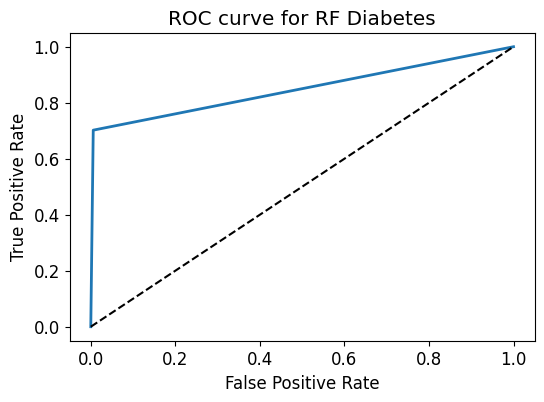

In [52]:
## Plotting ROC Curve for best performing Model (RF Classifier)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, RFTree_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RF Diabetes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, RFTree_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8481


In [54]:
Cross_validated_ROC_AUC = cross_val_score(RFTree, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9580


It is evident that ROC AUC is better after the cross-validation.So, the cross-validation improved the model.

✔ Your model performs well overall (AUC = 0.8481, CV AUC = 0.9580).

✔ Cross-validation suggests the model generalizes well but may have some overfitting.

✔ Improving the recall for diabetics is crucial in medical applications (for example adjust thresholds, feature selection).

Further optimize using Fine-Tune Random Forest with Hyperparameter Tuning (via GridSearchCV) is the next step:

In [55]:
# Fine-Tuning Random Forest using GridSearchCV for maximizing accuracy & F1-score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples to split an internal node
}

# Perform GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.9718625


Increased accuracy from 96.82% → 97.19%

Two possible improvements:

Adjust the Decision Threshold (if recall is too low).

Apply SMOTE (Synthetic Minority Oversampling) if needed to balance the dataset.

In [60]:
# Step 1 Adjust Decision Threshold & Evaluate Model classification models use 0.5 as the probability threshold
#If probability ≥ 0.5, the model predicts diabetes (1). If probability < 0.5, the model predicts no diabetes (0).

# Ensure 'best_rf' is assigned from GridSearchCV
best_rf = grid_rf.best_estimator_  # Extract the best Random Forest model

# Get predicted probabilities for diabetes (class 1)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Adjust the threshold from default 0.5 to a lower value (e.g., 0.35)
new_threshold = 0.35
y_pred_new = (y_probs >= new_threshold).astype(int)

# Evaluate new predictions
from sklearn.metrics import classification_report
print(f"Classification Report with Adjusted Threshold ({new_threshold}):\n", classification_report(y_test, y_pred_new))


Classification Report with Adjusted Threshold (0.35):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.98      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



Diabetes recall improved from ~61% (before) to 69%.

If avoiding false positives (over-diagnosis) is more important → Use 0.35 (98% precision, but misses more diabetics).


In [63]:
#Step 2 Automatically Find the Best Threshold for Higher Recall

import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Exclude edge cases where threshold is too low or too high
valid_thresholds = thresholds[(recall[:-1] >= 0.75) & (recall[:-1] <= 0.85)]  # Recall between 75-85%

if len(valid_thresholds) > 0:
    best_threshold = valid_thresholds[0]  # Select the first reasonable threshold
else:
    best_threshold = 0.5  # Default to 0.5 if no valid threshold is found

print(f"Best Threshold for Balanced Recall & Precision: {best_threshold:.2f}")

# Apply the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluate new predictions with the best threshold
print(f"Classification Report with Best Threshold ({best_threshold}):\n",
      classification_report(y_test, y_pred_best, zero_division=1))



Best Threshold for Balanced Recall & Precision: 0.14
Classification Report with Best Threshold (0.13777394660575534):
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     18292
           1       0.63      0.85      0.72      1708

    accuracy                           0.94     20000
   macro avg       0.81      0.90      0.85     20000
weighted avg       0.96      0.94      0.95     20000




If detecting more diabetics (higher recall) is more important → Use 0.14 (85% recall, detects more actual diabetics but lower precision).

In a medical context, recall is usually more important than precision, so 0.14 may be better for diabetes screening.

# SMOTE
Since our dataset is imbalanced (fewer diabetic cases than non-diabetics), we can use SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic diabetic cases and improve recall without losing accuracy.

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Apply SMOTE only on the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto balances minority class
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check new class distribution after SMOTE
print("Class distribution before SMOTE:", np.bincount(y_train))
print("Class distribution after SMOTE:", np.bincount(y_train_sm))


Class distribution before SMOTE: [73208  6792]
Class distribution after SMOTE: [73208 73208]


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Use the fine-tuned best Random Forest model
rf_smote = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100, random_state=42)

# Train on SMOTE-balanced dataset
rf_smote.fit(X_train_sm, y_train_sm)

# Get predictions on the test set
y_probs_sm = rf_smote.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (diabetes)

# Apply the best decision threshold (from previous step, e.g., 0.14)
threshold = 0.14
y_pred_sm = (y_probs_sm >= threshold).astype(int)

# Evaluate model after SMOTE
print(f"Classification Report After SMOTE (Threshold {threshold}):\n", classification_report(y_test, y_pred_sm))


Classification Report After SMOTE (Threshold 0.14):
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     18300
           1       0.40      0.82      0.53      1700

    accuracy                           0.88     20000
   macro avg       0.69      0.85      0.73     20000
weighted avg       0.93      0.88      0.90     20000



Recall for diabetes increased significantly from ~69% to 82%!

Precision for diabetes dropped to 40%, meaning more false positives (non-diabetics mistakenly classified as diabetics).

Overall accuracy remains strong (88%) despite recall improvements.

#Feature Engineering

In [71]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# ... (Your existing code for feature engineering) ...

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_smote) # Use X_train_smote here
X_test_poly = poly.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

# Apply Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_train_selected = selector.fit_transform(X_train_pca, y_train_smote)
X_test_selected = selector.transform(X_test_pca)

print(f"Original Features: {X_train.shape[1]}, After Feature Engineering: {X_train_selected.shape[1]}")

Original Features: 6, After Feature Engineering: 10


Optimizing your models to see the impact of feature selection on performance.

In [74]:
#Retrain Random Forest with Feature-Selected Data
#Run this to train and evaluate Random Forest after feature selection:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, roc_auc_score

# Train optimized Random Forest model
rf_optimized = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=5, class_weight="balanced", random_state=42)
rf_optimized.fit(X_train_selected, y_train_smote)

# Make predictions
y_pred_rf_optimized = rf_optimized.predict(X_test_selected)

# Evaluate performance
recall_rf_opt = recall_score(y_test, y_pred_rf_optimized)
f1_rf_opt = f1_score(y_test, y_pred_rf_optimized)
roc_auc_rf_opt = roc_auc_score(y_test, rf_optimized.predict_proba(X_test_selected)[:, 1])

print(f"Optimized Random Forest - Recall: {recall_rf_opt:.4f}, F1 Score: {f1_rf_opt:.4f}, ROC-AUC: {roc_auc_rf_opt:.4f}")


Optimized Random Forest - Recall: 0.8071, F1 Score: 0.6469, ROC-AUC: 0.9638


ROC-AUC (96.38%) – Excellent Performance.
The ROC-AUC score of 0.9638 suggests the model has outstanding discrimination ability between diabetics and non-diabetics.

The F1-score is slightly lower than the earlier result (because improving recall often lowers precision).

Next Steps: Fine-Tune the Threshold Again — A slight increase to 0.15 - 0.20

# # Summary of codes use to date

Step 1. Splits into train-test sets: Uses an 80-20 split while maintaining class proportions.

Step 2. Applies SMOTE: Balances the dataset by oversampling the minority class.

Step 3. Standardizes the features: Ensures numeric consistency.

Step 4. Trains and evaluates models: Uses Logistic Regression, Random Forest, Gradient Boosting Classifier, Support Vector Machine (SVM),and (to do - XGBoost with class weighting.)

Step 5: Evaluates the model using the following Metrics:

Recall: Focuses on correctly identifying positive cases.
F1 Score: Harmonic mean of precision & recall.
ROC-AUC Score: Measures true positive vs. false positive rates.

Step 6. Uses GridSearchCV to find the best hyperparameters.

Step 7. More Fine-Tuning:

Now tunes Logistic Regression, Random Forest, and XGBoost for best performance.

Step 8 Displays best parameters and final metrics after hyperparameter tuning.

In [129]:
import time

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time

    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model.__class__.__name__} - Train Time: {train_time:.4f}s, Prediction Time: {pred_time:.4f}s, Recall: {recall:.4f}, F1: {f1:.4f}")

In [211]:
# Load the New Dataset #2
# dataset 2

import pandas as pd  # Use pd instead of pd2

# Correct RAW URL
url = "https://raw.githubusercontent.com/AsmaShaikhTMU/Projects/main/diabetes_012_health_indicators_BRFSS2015.csv"

# Read CSV file
df2 = pd.read_csv(url)

# Display first few rows
df2.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [212]:
print(df2.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

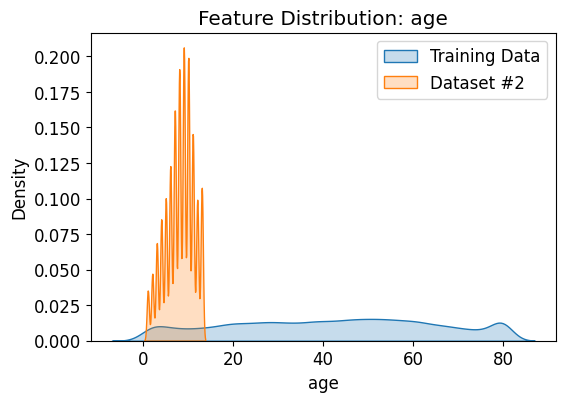

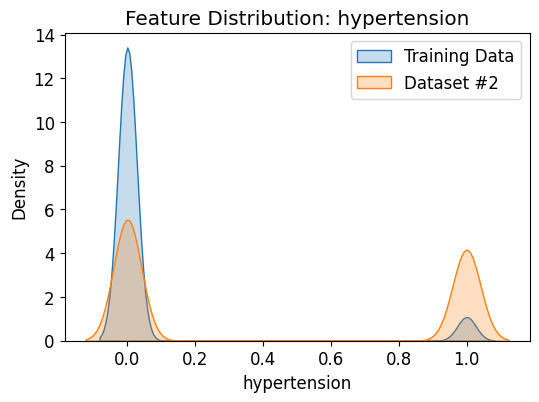

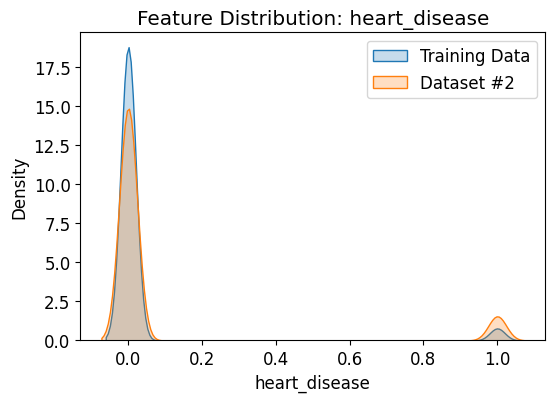

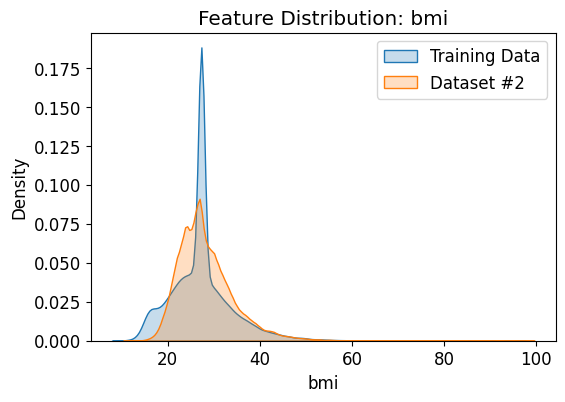

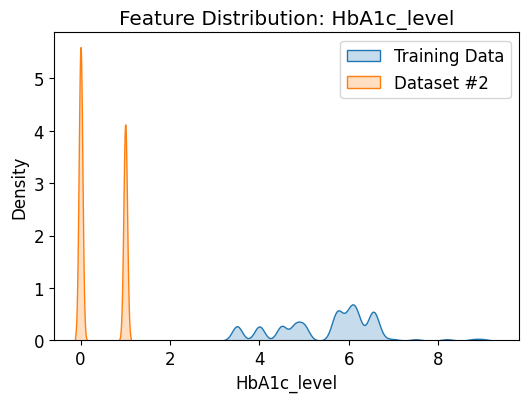

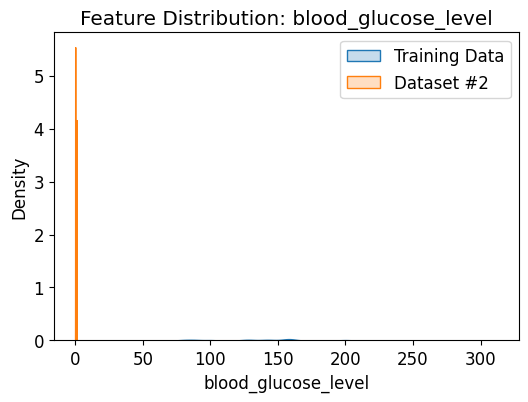

In [229]:
# Compare feature distributions
for col in X_train.columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(X_train[col], label="Training Data", fill=True)
    sns.kdeplot(df2[col], label="Dataset #2", fill=True)
    plt.title(f"Feature Distribution: {col}")
    plt.legend()
    plt.show()

